# Problem Statement: Taxi Trajectory Prediction for Final Destination
## Domain : Transpotation 

## Context
In modern urban environments, efficient transportation systems are crucial for minimizing travel time, reducing fuel consumption, and decreasing traffic congestion. Taxis play a significant role in this ecosystem, and predicting the final destination of a taxi trip can provide substantial benefits. These include improved dispatch systems, better ride-sharing matching, and enhanced passenger experience.

## Problem
Given the initial segment of a taxi's trajectory, predict the final destination of the trip. The trajectory data includes the sequence of GPS coordinates along with time stamps and other relevant features such as speed, heading, and possibly contextual information like weather conditions or traffic patterns.

## Objectives
- **Develop Predictive Models**: Create machine learning models that can accurately predict the final destination of a taxi trip based on the initial part of the trajectory.
- **Feature Engineering**: Identify and extract relevant features from the trajectory data that significantly influence the prediction accuracy.
- **Model Evaluation**: Establish metrics and evaluation frameworks to assess the performance of the predictive models. Common metrics might include Mean Absolute Error (MAE), Mean Squared Error (MSE), and accuracy within a certain radius.
- **Real-Time Prediction**: Ensure that the models are capable of making predictions in real-time or near-real-time to be practical for deployment in live taxi dispatch systems.

## Data


## Challenges
- **Data Sparsity**: Incomplete or sparsely sampled GPS data may affect the accuracy of predictions.
- **Dynamic Traffic Conditions**: Real-time traffic conditions can significantly influence the route taken by a taxi, making prediction more challenging.
- **Diverse Destinations**: Taxis can have a wide range of possible destinations, from popular landmarks to obscure locations, adding to the complexity.
- **Temporal Variability**: Time of day, day of the week, and seasonal variations can impact travel patterns and must be accounted for in the models.

## Tasks to be performed
1. Task 1: Data Loading and EDA
2. Task 2: Data Preprocessing
3. Task 3:  Model Building and Prediction
4. Task 4: Validation and Preparing the final result
5. Task 5: Validate the data for the accuracy observer based upon the test data.

## Expected Outcomes
- **Accurate Prediction Models**: High-performing models that can predict the final destination of a taxi trip with reasonable accuracy.
- **Insights into Trajectory Patterns**: Understanding of common trajectory patterns and factors influencing taxi routes.
- **Improved Transportation Systems**: Application of the prediction models to enhance taxi dispatching, reduce wait times, and improve overall efficiency of urban transportation systems.

## Evaluation Criteria
- **Prediction Accuracy**: Measured by how close the predicted destination is to the actual destination.
- **Computational Efficiency**: The ability of the model to make predictions quickly enough for real-time applications.
- **Robustness**: The model’s performance across different scenarios, including various times of day and traffic conditions.
- **Scalability**: The ability to handle large volumes of data and multiple taxis simultaneously.

This problem statement aims to address the complex task of predicting taxi destinations, contributing to more efficient urban transportation solutions and enhanced passenger experiences.


### Importing Libraries

In [99]:
# Besic Libraries
import numpy as np
import pandas as pd

import warnings

warnings.simplefilter('ignore')

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [100]:
# Data Preprocessing Libraries
import datetime
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [101]:
# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# %matplotlib inline

In [168]:
# Model 
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [103]:
# Parameter Optimization
from sklearn.model_selection import GridSearchCV

In [104]:
# Validation 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Data loading

In [105]:
data = pd.read_csv("./Data/train/train.csv")

In [106]:
print(f"The shape of the dataset is : {data.shape}")

The shape of the dataset is : (1710670, 9)


In [107]:
data.head()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[..."
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-..."
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-..."


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710670 entries, 0 to 1710669
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   TRIP_ID       int64  
 1   CALL_TYPE     object 
 2   ORIGIN_CALL   float64
 3   ORIGIN_STAND  float64
 4   TAXI_ID       int64  
 5   TIMESTAMP     int64  
 6   DAY_TYPE      object 
 7   MISSING_DATA  bool   
 8   POLYLINE      object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 106.0+ MB


In [109]:
data.describe()

,TRIP_ID,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP
count,1.710670e+06,364770.000000,806579.000000,1.710670e+06,1.710670e+06
mean,1.388622e+18,24490.363018,30.272381,2.000035e+07,1.388622e+09
std,9.180944e+15,19624.290043,17.747840,2.112405e+02,9.180944e+06
min,1.372637e+18,2001.000000,1.000000,2.000000e+07,1.372637e+09
25%,1.380731e+18,6593.000000,15.000000,2.000017e+07,1.380731e+09
50%,1.388493e+18,18755.000000,27.000000,2.000034e+07,1.388493e+09
75%,1.396750e+18,40808.000000,49.000000,2.000052e+07,1.396750e+09
max,1.404173e+18,63884.000000,63.000000,2.000098e+07,1.404173e+09


In [110]:
data.isnull().sum().sum()

2249991

In [111]:
data.isnull().sum()

TRIP_ID               0
CALL_TYPE             0
ORIGIN_CALL     1345900
ORIGIN_STAND     904091
TAXI_ID               0
TIMESTAMP             0
DAY_TYPE              0
MISSING_DATA          0
POLYLINE              0
dtype: int64

In [112]:
obj_cols = []
num_cols = []

for col in data.columns:
    if data[col].dtype == 'object':
        obj_cols.append(col)
    else:
        num_cols.append(col)

print(f"Object Columns : {obj_cols}")
print(f"Numerical Columns : {num_cols}")

Object Columns : ['CALL_TYPE', 'DAY_TYPE', 'POLYLINE']
Numerical Columns : ['TRIP_ID', 'ORIGIN_CALL', 'ORIGIN_STAND', 'TAXI_ID', 'TIMESTAMP', 'MISSING_DATA']


In [113]:
for i in range(data.shape[1]):
    print(f"-"*100)
    # print(data.columns[i])
    print(data.iloc[:,i].value_counts())

----------------------------------------------------------------------------------------------------
TRIP_ID
1397172149620000454    3
1402085470620000527    2
1389002485620000685    2
1393869017620000066    2
1389782974620000562    2
                      ..
1383230303620000482    1
1383229061620000294    1
1383230110620000068    1
1383227731620000239    1
1404157147620000079    1
Name: count, Length: 1710589, dtype: int64
----------------------------------------------------------------------------------------------------
CALL_TYPE
B    817881
C    528019
A    364770
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
ORIGIN_CALL
2002.0     57571
63882.0     6406
2001.0      2499
13168.0     1314
6728.0      1115
           ...  
23600.0        1
37142.0        1
7028.0         1
49288.0        1
34164.0        1
Name: count, Length: 57105, dtype: int64
-----------------------------------------------------------

### EDA

In [114]:
# Processing the time column
data['TIMESTAMP'] = [float(time) for time in data['TIMESTAMP']]

data['dt'] = [datetime.datetime.fromtimestamp(time, datetime.timezone.utc) for time in data['TIMESTAMP']]

In [115]:
data['TIMESTAMP'].value_counts()

TIMESTAMP
1.397135e+09    5
1.395949e+09    5
1.395946e+09    5
1.403586e+09    4
1.384658e+09    4
               ..
1.383356e+09    1
1.383357e+09    1
1.383358e+09    1
1.383358e+09    1
1.404157e+09    1
Name: count, Length: 1655366, dtype: int64

In [116]:
data['dt'].value_counts()

dt
2014-04-10 12:57:28+00:00    5
2014-03-27 19:31:22+00:00    5
2014-03-27 18:49:12+00:00    5
2014-06-24 04:58:36+00:00    4
2013-11-17 03:11:21+00:00    4
                            ..
2013-11-02 01:31:09+00:00    1
2013-11-02 01:45:08+00:00    1
2013-11-02 02:00:15+00:00    1
2013-11-02 02:08:21+00:00    1
2014-06-30 19:39:07+00:00    1
Name: count, Length: 1655366, dtype: int64

In [117]:
data['year'] = data['dt'].dt.year
data['month'] = data['dt'].dt.month
data['day'] = data['dt'].dt.day
data['hour'] = data['dt'].dt.hour
data['min'] = data['dt'].dt.minute
data['weekday'] = data['dt'].dt.weekday

In [118]:
data.head()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,dt,year,month,day,hour,min,weekday
0,1372636858620000589,C,NaN,NaN,20000589,1.372637e+09,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[...",2013-07-01 00:00:58+00:00,2013,7,1,0,0,0
1,1372637303620000596,B,NaN,7.0,20000596,1.372637e+09,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[...",2013-07-01 00:08:23+00:00,2013,7,1,0,8,0
2,1372636951620000320,C,NaN,NaN,20000320,1.372637e+09,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-...",2013-07-01 00:02:31+00:00,2013,7,1,0,2,0
3,1372636854620000520,C,NaN,NaN,20000520,1.372637e+09,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[...",2013-07-01 00:00:54+00:00,2013,7,1,0,0,0
4,1372637091620000337,C,NaN,NaN,20000337,1.372637e+09,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-...",2013-07-01 00:04:51+00:00,2013,7,1,0,4,0


In [119]:
# analysing the first row of POLYLINE
lon_N_lat = data.loc[0, 'POLYLINE']

In [120]:
lon_N_lat

'[[-8.618643,41.141412],[-8.618499,41.141376],[-8.620326,41.14251],[-8.622153,41.143815],[-8.623953,41.144373],[-8.62668,41.144778],[-8.627373,41.144697],[-8.630226,41.14521],[-8.632746,41.14692],[-8.631738,41.148225],[-8.629938,41.150385],[-8.62911,41.151213],[-8.629128,41.15124],[-8.628786,41.152203],[-8.628687,41.152374],[-8.628759,41.152518],[-8.630838,41.15268],[-8.632323,41.153022],[-8.631144,41.154489],[-8.630829,41.154507],[-8.630829,41.154516],[-8.630829,41.154498],[-8.630838,41.154489]]'

In [121]:
# Extracting the first and last coordinates
print("First Longitude ", re.sub(r"[[|[|]|]|]]", "", lon_N_lat).split(",")[0])
print("First Latitude ", re.sub(r"[[|[|]|]|]]", "", lon_N_lat).split(",")[1])
print("Last Longitude ", re.sub(r"[[|[|]|]|]]", "", lon_N_lat).split(",")[-2])
print("Last Latitude ", re.sub(r"[[|[|]|]|]]", "", lon_N_lat).split(",")[-1])

First Longitude  -8.618643
First Latitude  41.141412
Last Longitude  -8.630838
Last Latitude  41.154489


### Data Visualization

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Month-wise Trip Count')

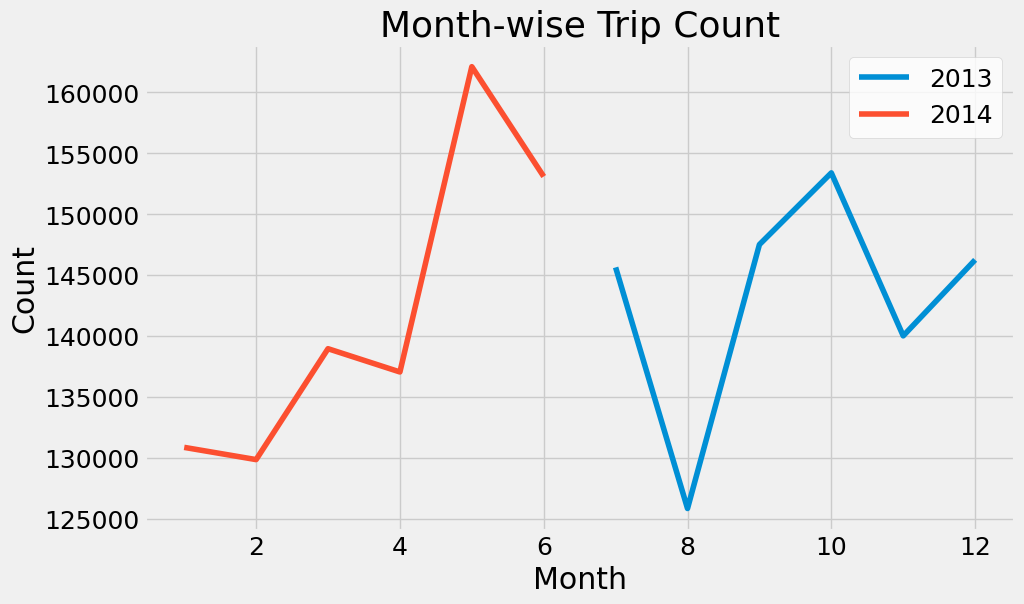

In [122]:
# Time Series Visualization
pivot = pd.pivot_table(data=data, index='month', columns='year', values='TRIP_ID', aggfunc='count').reset_index()

# Visualizing as per month count
with plt.style.context("fivethirtyeight"):
    plt.figure(figsize=(10, 6))
    plt.rcParams['font.size'] = 18
    plt.plot(pivot['month'], pivot[2013], label='2013')
    plt.plot(pivot['month'], pivot[2014], label='2014')
    plt.xlabel("Month")
    plt.ylabel("Count")
    plt.legend(facecolor='white')
    plt.title("Month-wise Trip Count")


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Weekday [0:Monday ~ 6:Sunday]')

Text(0, 0.5, 'Count')

(200000.0, 300000.0)

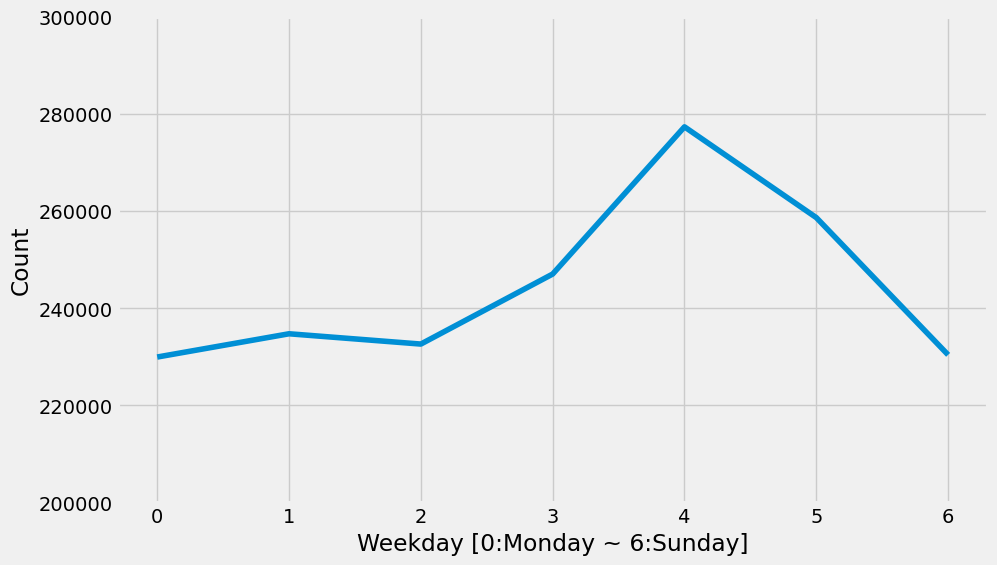

In [123]:
# Weekly groupby data
weekday = pd.DataFrame(data=data.groupby('weekday').TRIP_ID.count()).reset_index()

# Visualizing as per weekday count
with plt.style.context("fivethirtyeight"):
    plt.figure(figsize=(10, 6))
    
    plt.plot(weekday['weekday'], weekday['TRIP_ID'])
    plt.xlabel("Weekday [0:Monday ~ 6:Sunday]")
    plt.ylabel("Count")
    plt.ylim([200000, 300000])

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 3 artists>

Text(0.5, 0, 'Call_Type')

Text(0, 0.5, 'Count')

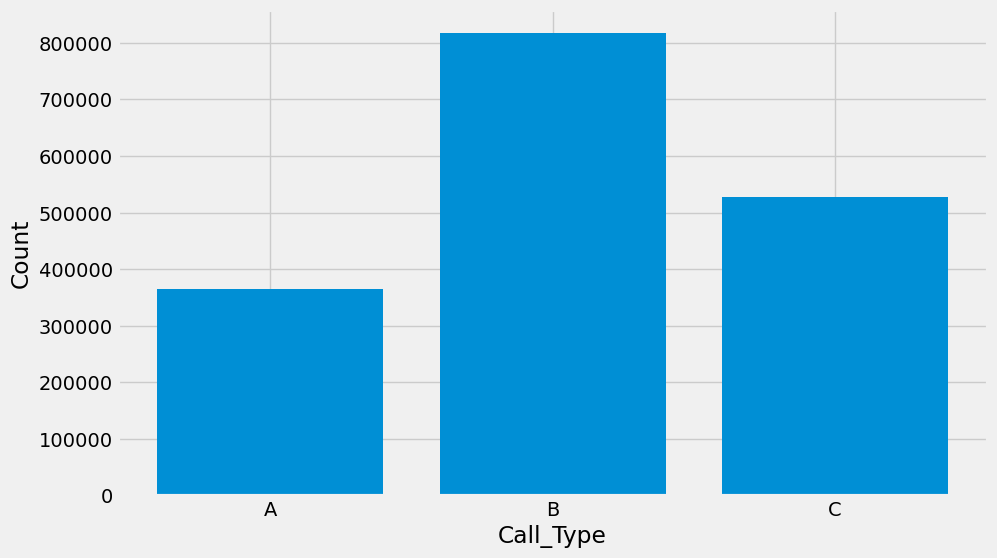

In [124]:
# Call_Type
call_type = pd.DataFrame(data=data.groupby('CALL_TYPE').TRIP_ID.count()).reset_index()

# Visualizing as per weekday count
with plt.style.context("fivethirtyeight"):
    plt.figure(figsize=(10, 6))
    
    plt.bar(call_type['CALL_TYPE'], call_type['TRIP_ID'])
    plt.xlabel("Call_Type")
    plt.ylabel("Count")

In [125]:
# First Longitude
first_longitudes = []

for i in range(0, len(data['POLYLINE'])):
    if data['POLYLINE'][i] == '[]':
        k = 0
        first_longitudes.append(k)
    else:
        k = re.sub(r"[[|[|]|]|]]", "", data['POLYLINE'][i]).split(",")[0]
        first_longitudes.append(k)

data['1st_longitude'] = first_longitudes

# First Latitude
first_latitudes = []

for i in range(0, len(data['POLYLINE'])):
    if data['POLYLINE'][i] == '[]':
        k = 0
        first_latitudes.append(k)
    else:
        k = re.sub(r"[[|[|]|]|]]", "", data['POLYLINE'][i]).split(",")[1]
        first_latitudes.append(k)

data['1st_latitude'] = first_latitudes

In [126]:
# Last Longitude
last_longitudes = []

for i in range(0, len(data['POLYLINE'])):
    if data['POLYLINE'][i] == '[]':
        k = 0
        last_longitudes.append(k)
    else:
        k = re.sub(r"[[|[|]|]|]]", "", data['POLYLINE'][i]).split(",")[-2]
        last_longitudes.append(k)

data['last_longitude'] = last_longitudes

# Last Latitude
last_latitudes = []

for i in range(0, len(data['POLYLINE'])):
    if data['POLYLINE'][i] == '[]':
        k = 0
        last_latitudes.append(k)
    else:
        k = re.sub(r"[[|[|]|]|]]", "", data['POLYLINE'][i]).split(",")[-1]
        last_latitudes.append(k)

data['last_latitudes'] = last_latitudes

In [127]:
# Delete rows where longitude and latitude are 0

# data = data.query("1st_longitude != 0")
# data = data.query("1st_latitude != 0")
data = data.query("last_longitude != 0")
# data = data.query("last_latitude != 0")


In [128]:
data.head()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,dt,year,month,day,hour,min,weekday,1st_longitude,1st_latitude,last_longitude,last_latitudes
0,1372636858620000589,C,NaN,NaN,20000589,1.372637e+09,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[...",2013-07-01 00:00:58+00:00,2013,7,1,0,0,0,-8.618643,41.141412,-8.630838,41.154489
1,1372637303620000596,B,NaN,7.0,20000596,1.372637e+09,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[...",2013-07-01 00:08:23+00:00,2013,7,1,0,8,0,-8.639847,41.159826,-8.66574,41.170671
2,1372636951620000320,C,NaN,NaN,20000320,1.372637e+09,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-...",2013-07-01 00:02:31+00:00,2013,7,1,0,2,0,-8.612964,41.140359,-8.61597,41.14053
3,1372636854620000520,C,NaN,NaN,20000520,1.372637e+09,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[...",2013-07-01 00:00:54+00:00,2013,7,1,0,0,0,-8.574678,41.151951,-8.607996,41.142915
4,1372637091620000337,C,NaN,NaN,20000337,1.372637e+09,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-...",2013-07-01 00:04:51+00:00,2013,7,1,0,4,0,-8.645994,41.18049,-8.687268,41.178087


In [129]:
# Converting the longitude and latitude string values to float values

data['1st_longitude'] = [float(val) for val in data['1st_longitude']]
data['1st_latitude'] = [float(val) for val in data['1st_latitude']]

data['last_longitude'] = [float(val) for val in data['last_longitude']]
data['last_latitudes'] = [float(val) for val in data['last_latitudes']]


In [136]:
# Sample 5000 rows for visualization
sample_data = data.head(5000)

# Create DataFrame for 1st and last coordinates
mapping_1st = pd.DataFrame({
    'date': sample_data['dt'].values,
    'lat': sample_data['1st_latitude'].values,
    'lon': sample_data['1st_longitude'].values
})

mapping_last = pd.DataFrame({
    'date': sample_data['dt'].values,
    'lat': sample_data['last_latitudes'].values,
    'lon': sample_data['last_longitude'].values
})

# Create a map centered at a specific location
map_ = folium.Map(location=[41.141412, -8.590324], tiles="Stamen Terrain", zoom_start=11)

# Add 1st coordinates to the map as red circles
for i, r in mapping_1st.iterrows():
    folium.CircleMarker(location=[r['lat'], r['lon']], radius=0.5, color='red').add_to(map_)

# Add last coordinates to the map as blue circles
for i, r in mapping_last.iterrows():
    folium.CircleMarker(location=[r['lat'], r['lon']], radius=0.5, color='blue').add_to(map_)

# Save the map to an HTML file
map_.save("taxi_trajectory_map.jpg")

# Display the map
map_

In [140]:
data['delta_longitude'] = data['last_longitude'] - data['1st_longitude']
data['delta_latitude'] = data['last_latitudes'] - data['1st_latitude']

Text(0.5, 0, 'Delta Longitude')

Text(0, 0.5, 'Delta Latitude')

(array([1.000e+00, 0.000e+00, 1.000e+00, 1.600e+01, 1.920e+02, 8.250e+02,
        2.211e+03, 1.405e+03, 2.950e+02, 4.600e+01, 4.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([-0.248454 , -0.2119686, -0.1754832, -0.1389978, -0.1025124,
        -0.066027 , -0.0295416,  0.0069438,  0.0434292,  0.0799146,
         0.1164   ,  0.1528854,  0.1893708,  0.2258562,  0.2623416,
         0.298827 ,  0.3353124,  0.3717978,  0.4082832,  0.4447686,
         0.481254 ,  0.5177394,  0.5542248,  0.5907102,  0.6271956,
         0.663681 ,  0.7001664,  0.7366518,  0.7731372,  0.8096226,
         0.846108 ]),
 <BarContainer object of 30 artists>)

Text(0.5, 0, 'Delta Longitude')

Text(0, 0.5, 'Count')

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 1.200e+01,
        1.100e+01, 3.300e+01, 3.670e+02, 2.813e+03, 1.307e+03, 1.600e+02,
        2.690e+02, 1.300e+01, 6.000e+00, 2.000e+00, 0.000e+00, 2.000e+00]),
 array([-0.663975, -0.633372, -0.602769, -0.572166, -0.541563, -0.51096 ,
        -0.480357, -0.449754, -0.419151, -0.388548, -0.357945, -0.327342,
        -0.296739, -0.266136, -0.235533, -0.20493 , -0.174327, -0.143724,
        -0.113121, -0.082518, -0.051915, -0.021312,  0.009291,  0.039894,
         0.070497,  0.1011  ,  0.131703,  0.162306,  0.192909,  0.223512,
         0.254115]),
 <BarContainer object of 30 artists>)

Text(0.5, 0, 'Delta Latitude')

Text(0, 0.5, 'Count')

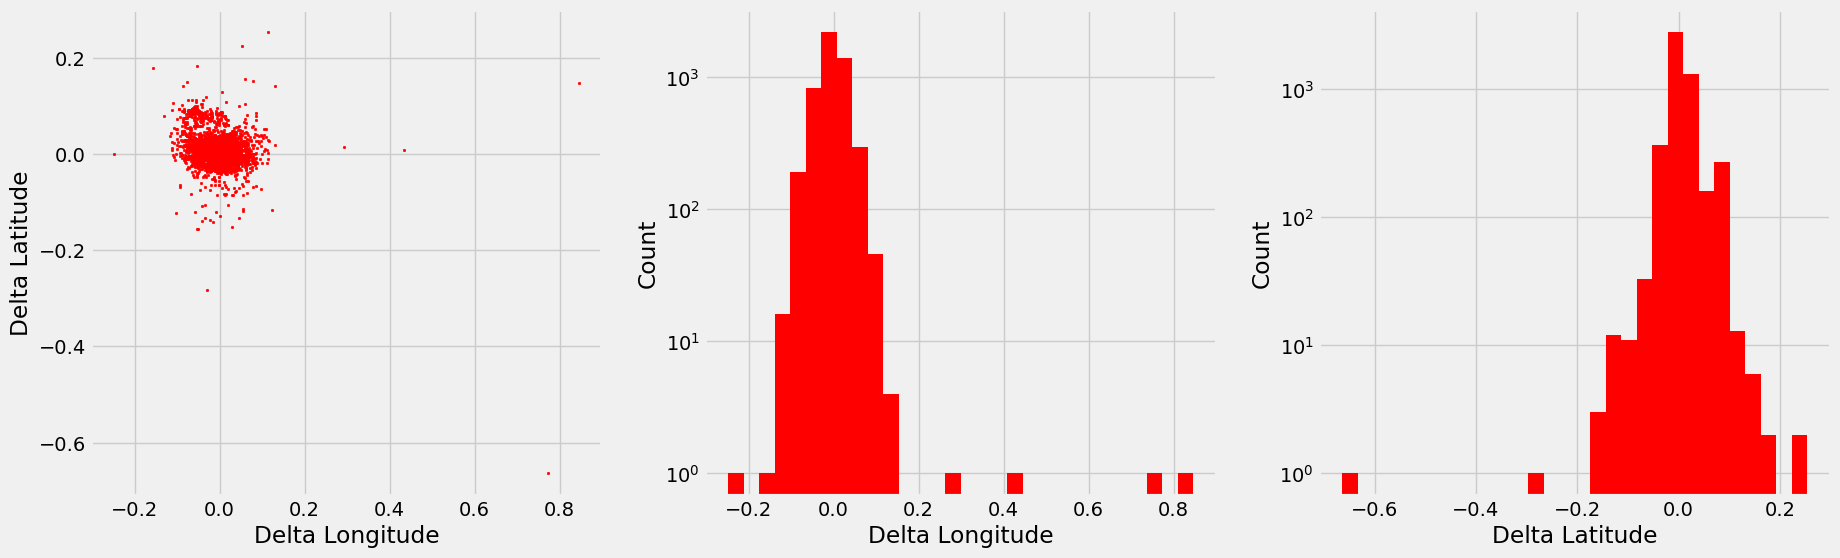

In [142]:
sample_data = data.head(5000)

with plt.style.context("fivethirtyeight"):
    fig, ax = plt.subplots(1, 3, figsize=(20, 6))

    # plot
    ax[0].scatter(sample_data['delta_longitude'], sample_data['delta_latitude'], s=3, c='red')
    ax[0].set_xlabel("Delta Longitude")
    ax[0].set_ylabel("Delta Latitude")

    # Delta Longitude distribution
    ax[1].hist(sample_data['delta_longitude'], bins=30, color='red')
    ax[1].set_xlabel("Delta Longitude")
    ax[1].set_ylabel("Count")
    ax[1].set_yscale('log')

     # Delta Longitude distribution
    ax[2].hist(sample_data['delta_latitude'], bins=30, color='red')
    ax[2].set_xlabel("Delta Latitude")
    ax[2].set_ylabel("Count")
    ax[2].set_yscale('log')

In [143]:
# Monthly delta longitude and delta latitude boxplot
data['month_str'] = [str(val) for val in data['month']]

<Axes: xlabel='month_str', ylabel='delta_longitude'>

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Delta Longitude')

(-0.3, 0.3)

<Axes: xlabel='month_str', ylabel='delta_latitude'>

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Delta Latitude')

(-0.3, 0.3)

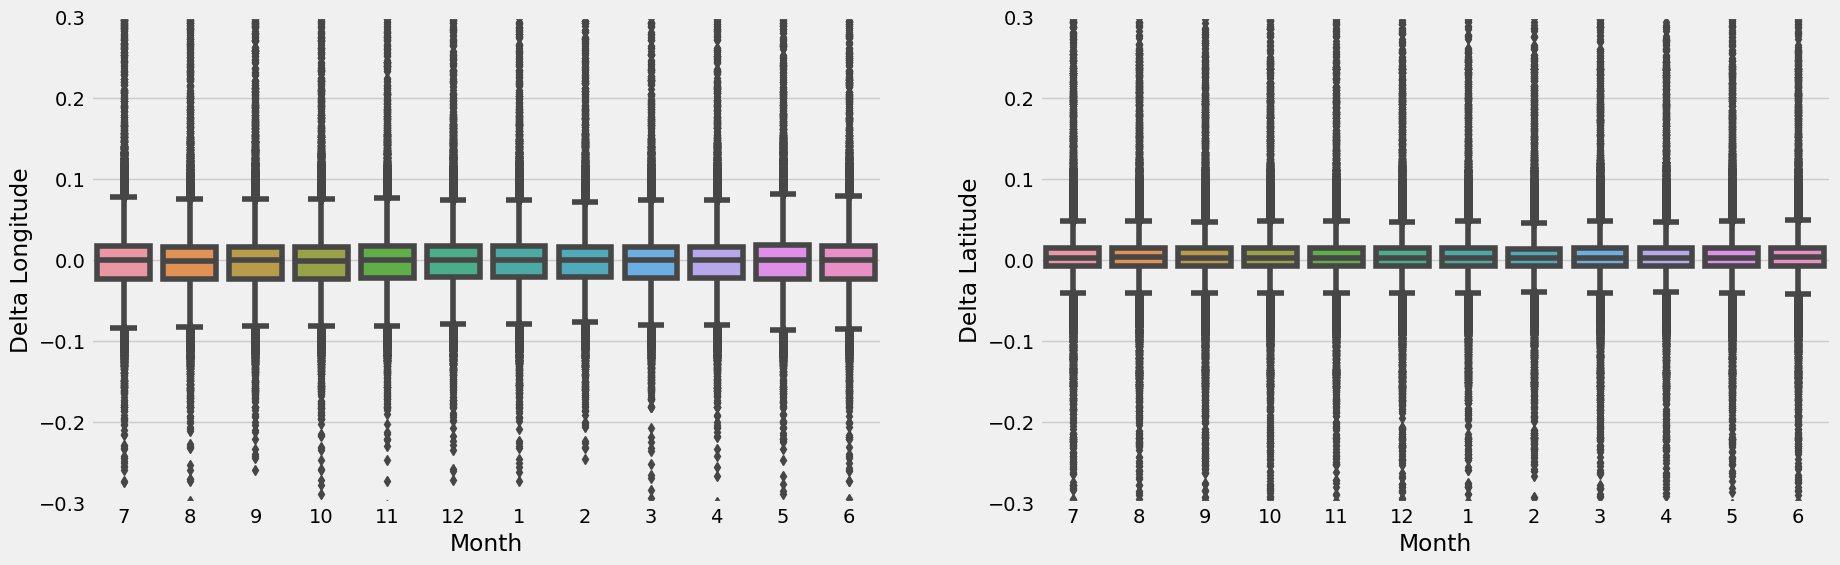

In [145]:
with plt.style.context("fivethirtyeight"):
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))
    
    # Delta Longitude boxplot
    sns.boxplot(x='month_str', y='delta_longitude', data = data, ax=ax[0])
    ax[0].set_xlabel("Month")
    ax[0].set_ylabel("Delta Longitude")
    ax[0].set_ylim(-0.3, 0.3)

    # Delta Latitude boxplot
    sns.boxplot(x='month_str', y='delta_latitude', data = data, ax=ax[1])
    ax[1].set_xlabel("Month")
    ax[1].set_ylabel("Delta Latitude")
    ax[1].set_ylim(-0.3, 0.3)

In [146]:
# Monthly delta longitude and delta latitude boxplot
data['weekday_str'] = [str(val) for val in data['weekday']]

<Axes: xlabel='weekday_str', ylabel='delta_longitude'>

Text(0.5, 0, 'Week')

Text(0, 0.5, 'Delta Longitude')

(-0.3, 0.3)

<Axes: xlabel='weekday_str', ylabel='delta_latitude'>

Text(0.5, 0, 'Week')

Text(0, 0.5, 'Delta Latitude')

(-0.3, 0.3)

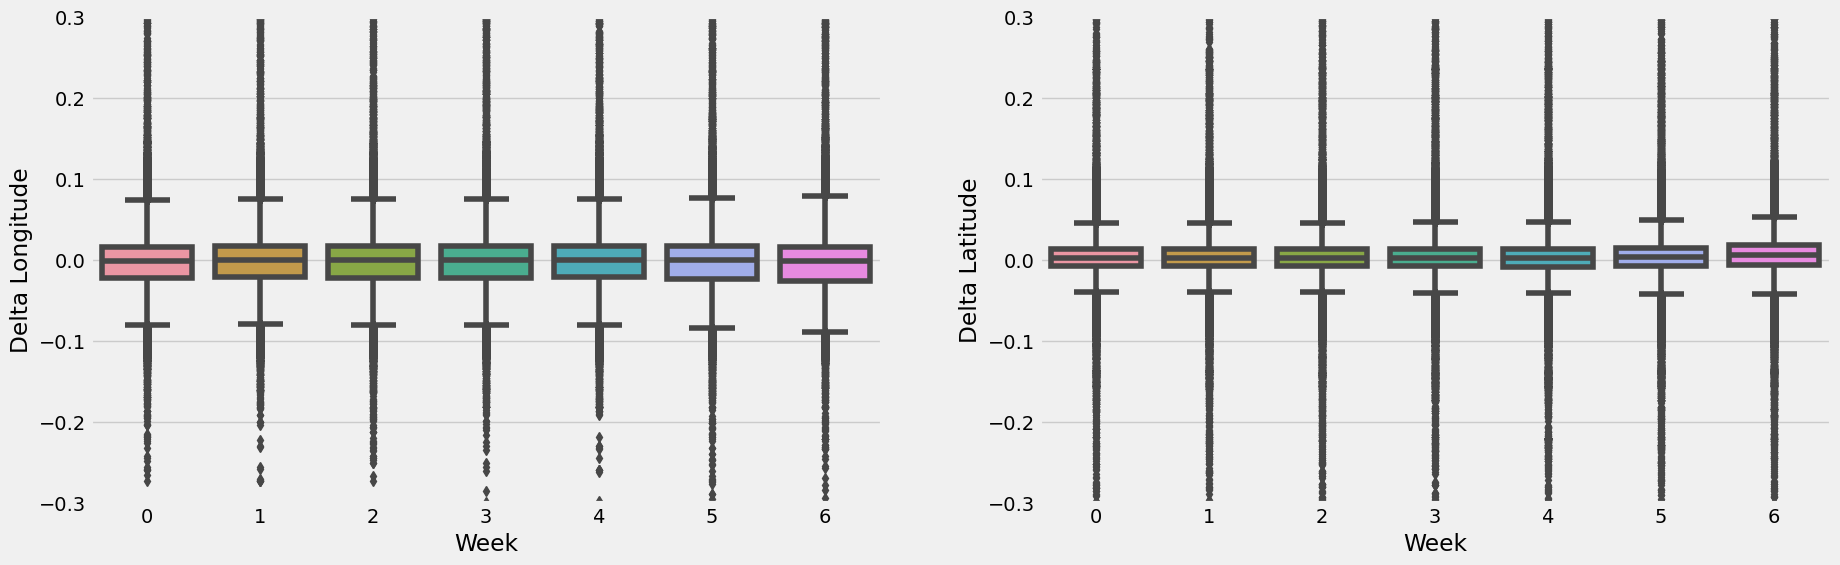

In [147]:
with plt.style.context("fivethirtyeight"):
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))
    
    # Delta Longitude boxplot
    sns.boxplot(x='weekday_str', y='delta_longitude', data = data, ax=ax[0])
    ax[0].set_xlabel("Week")
    ax[0].set_ylabel("Delta Longitude")
    ax[0].set_ylim(-0.3, 0.3)

    # Delta Latitude boxplot
    sns.boxplot(x='weekday_str', y='delta_latitude', data = data, ax=ax[1])
    ax[1].set_xlabel("Week")
    ax[1].set_ylabel("Delta Latitude")
    ax[1].set_ylim(-0.3, 0.3)

### Feature Engineering

In [148]:
df = data.copy()

In [149]:
# Removing outliers from copy
df = df.query("delta_longitude <= 0.2 & delta_longitude >= -0.2 & delta_latitude <= 0.2 & delta_latitude >= -0.2")

In [150]:
df.head()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,dt,...,min,weekday,1st_longitude,1st_latitude,last_longitude,last_latitudes,delta_longitude,delta_latitude,month_str,weekday_str
0,1372636858620000589,C,NaN,NaN,20000589,1.372637e+09,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[...",2013-07-01 00:00:58+00:00,...,0,0,-8.618643,41.141412,-8.630838,41.154489,-0.012195,0.013077,7,0
1,1372637303620000596,B,NaN,7.0,20000596,1.372637e+09,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[...",2013-07-01 00:08:23+00:00,...,8,0,-8.639847,41.159826,-8.665740,41.170671,-0.025893,0.010845,7,0
2,1372636951620000320,C,NaN,NaN,20000320,1.372637e+09,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-...",2013-07-01 00:02:31+00:00,...,2,0,-8.612964,41.140359,-8.615970,41.140530,-0.003006,0.000171,7,0
3,1372636854620000520,C,NaN,NaN,20000520,1.372637e+09,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[...",2013-07-01 00:00:54+00:00,...,0,0,-8.574678,41.151951,-8.607996,41.142915,-0.033318,-0.009036,7,0
4,1372637091620000337,C,NaN,NaN,20000337,1.372637e+09,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-...",2013-07-01 00:04:51+00:00,...,4,0,-8.645994,41.180490,-8.687268,41.178087,-0.041274,-0.002403,7,0


In [151]:
df.columns

Index(['TRIP_ID', 'CALL_TYPE', 'ORIGIN_CALL', 'ORIGIN_STAND', 'TAXI_ID',
       'TIMESTAMP', 'DAY_TYPE', 'MISSING_DATA', 'POLYLINE', 'dt', 'year',
       'month', 'day', 'hour', 'min', 'weekday', '1st_longitude',
       '1st_latitude', 'last_longitude', 'last_latitudes', 'delta_longitude',
       'delta_latitude', 'month_str', 'weekday_str'],
      dtype='object')

In [152]:
map_call_type = {"A": 1, "B": 2, "C": 3}
df['Call_Type'] = df['CALL_TYPE'].map(map_call_type)

In [153]:
# ORIGIN_CALL
def origin_call(x):
    if x['ORIGIN_CALL'] == None:
        res = 0
    else:
        res = 1
    return res

df['ORIGIN_CALL'] = df.apply(origin_call, axis=1)

# ORIGIN_STAND
def origin_stand(x):
    if x['ORIGIN_STAND'] == None:
        res = 0
    else:
        res = 1
    return res

df['ORIGIN_STAND'] = df.apply(origin_stand, axis=1)

# MISSING_DATA
def missing_data(x):
    if x['MISSING_DATA'] == None:
        res = 1
    else:
        res = 0
    return res

df['MISSING_DATA'] = df.apply(missing_data, axis=1)

df.drop('DAY_TYPE', axis=1, inplace=True)

### Feature Selection and Data Splitting

In [154]:
df = df.sample(70000)

In [155]:
df.columns

Index(['TRIP_ID', 'CALL_TYPE', 'ORIGIN_CALL', 'ORIGIN_STAND', 'TAXI_ID',
       'TIMESTAMP', 'MISSING_DATA', 'POLYLINE', 'dt', 'year', 'month', 'day',
       'hour', 'min', 'weekday', '1st_longitude', '1st_latitude',
       'last_longitude', 'last_latitudes', 'delta_longitude', 'delta_latitude',
       'month_str', 'weekday_str', 'Call_Type'],
      dtype='object')

In [161]:
X = df[['Call_Type', 'ORIGIN_CALL', 'ORIGIN_STAND', 'MISSING_DATA', '1st_longitude','1st_latitude','delta_longitude', 'delta_latitude']]
y = df[['last_longitude', 'last_latitudes']]

In [162]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 804173 to 892088
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Call_Type        70000 non-null  int64  
 1   ORIGIN_CALL      70000 non-null  int64  
 2   ORIGIN_STAND     70000 non-null  int64  
 3   MISSING_DATA     70000 non-null  int64  
 4   1st_longitude    70000 non-null  float64
 5   1st_latitude     70000 non-null  float64
 6   delta_longitude  70000 non-null  float64
 7   delta_latitude   70000 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 4.8 MB


In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

### Model Building and Evaluation

In [158]:
model = MultiOutputRegressor(
        RandomForestRegressor(n_estimators=100, random_state=10)
    )

In [164]:
model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=10))

In [165]:
y_pred_train = model.predict(X_train)

y_pred_test = model.predict(X_test)

In [167]:
import math

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

rmse_train = math.sqrt(mse_train)
rmse_test = math.sqrt(mse_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)


print(f"Train MSE score   :  {mse_train}")
print(f"Test MSE score    :  {mse_test}")
print("-"*80)
print(f"Train RMSE score  :  {rmse_train}")
print(f"Test RMSE score   :  {rmse_test}")
print("-"*80)
print(f"Train R2 score    :  {r2_train}")
print(f"Test R2 score     :  {r2_test}")

Train MSE score   :  0.00016713799628091905
Test MSE score    :  1.4710740279416739e-05
--------------------------------------------------------------------------------
Train RMSE score  :  0.012928186117198308
Test RMSE score   :  0.003835458288055906
--------------------------------------------------------------------------------
Train R2 score    :  0.9296497794269962
Test R2 score     :  0.9806050893129401


In [173]:
# Define parameter grids for each model
param_grids = {
    'XGBRegressor': {
        'estimator__n_estimators': [50, 100],
        'estimator__learning_rate': [0.01, 0.1],
        'estimator__max_depth': [3, 5]
    },
    'GradientBoostingRegressor': {
        'estimator__n_estimators': [50, 100],
        'estimator__learning_rate': [0.01, 0.1],
        'estimator__max_depth': [3, 5]
    },
}

# Define the models
models = {
    'XGBRegressor': MultiOutputRegressor(XGBRegressor(objective='reg:squarederror', random_state=10)),
    'GradientBoostingRegressor': MultiOutputRegressor(GradientBoostingRegressor(random_state=10)),
}

# Perform grid search for each model
best_params = {}
best_scores = {}

for model_name, model in models.items():
    print(f"-"*80)
    print(f"Fitting {model_name}")
    print(f"-"*80)

    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grids[model_name],
        scoring='neg_mean_squared_error',
        cv=5,
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_train, y_train)

    best_params[model_name] = grid.best_params_
    best_scores[model_name] = -grid.best_score_

for model_name in models.keys():
    print(f"Best parameters for {model_name}    :   {best_params[model_name]}")
    print(f"Best score for {model_name}    :   {best_scores[model_name]}")
    print(f"-"*80)
    print(f"-"*80)


--------------------------------------------------------------------------------
Fitting XGBRegressor
--------------------------------------------------------------------------------
Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=MultiOutputRegressor(estimator=XGBRegressor(base_score=None,
                                                                   booster=None,
                                                                   callbacks=None,
                                                                   colsample_bylevel=None,
                                                                   colsample_bynode=None,
                                                                   colsample_bytree=None,
                                                                   device=None,
                                                                   early_stopping_rounds=None,
                                                                   enable_categorical=False,
                                                                   eval_metric=None,
                                                                   feature_types=None,
                                                                   gamma=None,
                                                                   grow_policy=None,
                                                                   importance_type=None,
                                                                   interaction_constr...
                                                                   max_depth=None,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=None,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   random_state=10, ...)),
             n_jobs=-1,
             param_grid={'estimator__learning_rate': [0.01, 0.1],
                         'estimator__max_depth': [3, 5],
                         'estimator__n_estimators': [50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

--------------------------------------------------------------------------------
Fitting GradientBoostingRegressor
--------------------------------------------------------------------------------
Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=MultiOutputRegressor(estimator=GradientBoostingRegressor(random_state=10)),
             n_jobs=-1,
             param_grid={'estimator__learning_rate': [0.01, 0.1],
                         'estimator__max_depth': [3, 5],
                         'estimator__n_estimators': [50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

Best parameters for XGBRegressor    :   {'estimator__learning_rate': 0.1, 'estimator__max_depth': 5, 'estimator__n_estimators': 100}
Best score for XGBRegressor    :   0.0012218630180320497
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Best parameters for GradientBoostingRegressor    :   {'estimator__learning_rate': 0.1, 'estimator__max_depth': 3, 'estimator__n_estimators': 100}
Best score for GradientBoostingRegressor    :   0.0009440799072045007
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


In [172]:
# XGBoost
model = MultiOutputRegressor(
        XGBRegressor(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=5,
            objective='reg:squarederror',
            random_state=10)
    )

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

rmse_train = math.sqrt(mse_train)
rmse_test = math.sqrt(mse_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train MSE score   :  {mse_train}")
print(f"Test MSE score    :  {mse_test}")
print("-"*80)
print(f"Train RMSE score  :  {rmse_train}")
print(f"Test RMSE score   :  {rmse_test}")
print("-"*80)
print(f"Train R2 score    :  {r2_train}")
print(f"Test R2 score     :  {r2_test}")

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=10, ...))

Train MSE score   :  9.23661507745573e-06
Test MSE score    :  2.4414498629206908e-05
--------------------------------------------------------------------------------
Train RMSE score  :  0.003039180000831759
Test RMSE score   :  0.004941102976988731
--------------------------------------------------------------------------------
Train R2 score    :  0.9958703536917306
Test R2 score     :  0.9679762507948259


In [174]:
# XGBoost
model = MultiOutputRegressor(
        GradientBoostingRegressor(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=3,
            random_state=10)
    )

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

rmse_train = math.sqrt(mse_train)
rmse_test = math.sqrt(mse_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train MSE score   :  {mse_train}")
print(f"Test MSE score    :  {mse_test}")
print("-"*80)
print(f"Train RMSE score  :  {rmse_train}")
print(f"Test RMSE score   :  {rmse_test}")
print("-"*80)
print(f"Train R2 score    :  {r2_train}")
print(f"Test R2 score     :  {r2_test}")

MultiOutputRegressor(estimator=GradientBoostingRegressor(random_state=10))

Train MSE score   :  2.5090159615027634e-06
Test MSE score    :  5.018684005804412e-06
--------------------------------------------------------------------------------
Train RMSE score  :  0.0015839873615350482
Test RMSE score   :  0.00224024195251415
--------------------------------------------------------------------------------
Train R2 score    :  0.9988795651585631
Test R2 score     :  0.9938480693638918
